In [13]:
def percepton(x, w, b):
    z = 0
    for i in range(len(x)):
        z += x[i] * w[i]
    z += b
    return 1 if z > 0 else 0


X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 1] #or 

aprendiendo = 0.01 #learning rate

w = [0, 0]; b = 1
for r in range(1000):
    for i in range(len(X)):
        # avanzar  (dato los pesos calculo el valor)
        yp = percepton(X[i], w, b) # Estima el valor de y

        # retrocede (dato el valor calculo los pesos)
        e = y[i] - yp # Calcula el error

        for j in range(len(w)): # Actualiza los pesos
            w[j] += aprendiendo * e * X[i][j]
        b += aprendiendo * e

print("Pesos finales: ", w, b)


Pesos finales:  [0.01, 0.01] -7.528699885739343e-16


In [14]:
import matplotlib.pyplot as plt
def mostrarResultado(X, y, w, b):
    for i in range(len(X)):
        yp = percepton(X[i], w, b)
        print(X[i], yp, '😄' if y[i] == yp else '😡')
def mostrar(X, y, w, b):

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.xticks([0, 1])
    plt.yticks([0, 1])

    plt.grid()
    for x,y in zip(X,y):
        plt.plot(x[0], x[1], 'bo' if y else 'ro', markersize=20)
        plt.text(x[0], x[1], f'{y}', fontsize=40)
        # Define the line equation based on weights and bias
    x_vals = np.linspace(-0.2, 1.2, 100)
    y_vals = -(w[0] * x_vals + b) / w[1]

    # Plot the line
    plt.plot(x_vals, y_vals, 'g--')
    plt.show()

In [32]:
class Perceptron:
    def __init__(self, aprendizaje, epocas):
        self.aprendizaje = aprendizaje
        self.epocas = epocas
        self.w = None  # Inicializar los pesos
        self.b = 0

    def ajustar(self, X, y):
        self.w = [0.0] * len(X[0])  # Inicializar los pesos con ceros
        self.b = 0
        for r in range(self.epocas):
            for i in range(len(X)):
                # avanzar  (dato los pesos calculo el valor)
                yp = self.avanzar(X[i])  # Estima el valor de y

                # retrocede (dato el valor calculo los pesos)
                e = y[i] - yp  # Calcula el error

                for j in range(len(self.w)):  # Actualiza los pesos
                    self.w[j] += self.aprendizaje * e * X[i][j]
                self.b += self.aprendizaje * e

    def avanzar(self, x):
        suma = sum(w * xi for w, xi in zip(self.w, x)) + self.b
        return self.activacion(suma)
    
    def activacion(self, x):
        return 1 if x > 0 else 0

    def predecir(self, x):
        return self.avanzar(x)

class PerceptronLinea(Perceptron):
    def activacion(self, x):
        return x


In [29]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 1] #or 

p = Perceptron(0.1, 100)
p.ajustar(X, y)

print(p.w, p.b)
print(p.predecir([1, 0]))

[0.1, 0.1] -0.1
1


In [17]:
import pandas as pd
def cargar(tipo='Iris-setosa'):
    datos = pd.read_csv('iris.csv')
    X = datos[['SepalLength', 'SepalWidth', 'PetalLength','PetalWidth' ]].values.tolist()
    tipos = datos['Name'].values.tolist()
    y = [1 if t == tipo else 0 for t in tipos]
    return X, y 

In [33]:
X, y = cargar()

p = Perceptron(0.001, 1000)
p.ajustar(X, y)

for e in [20, 30, 60, 100, 120]:
    print(p.predecir(X[e]), y[e])

1 1
1 1
0 0
0 0
0 0


Para 30 las ventas son de 653.7078002305275


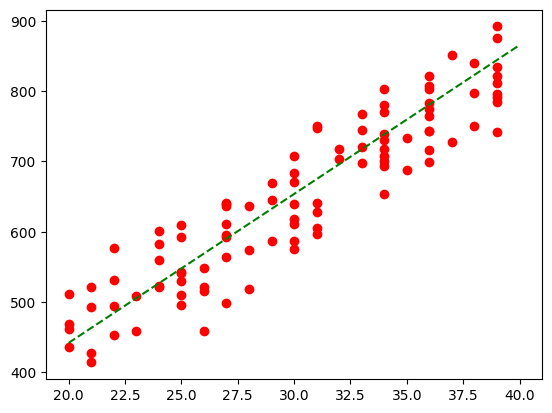

In [44]:
import numpy as np
def cargarHelado():
    datos = pd.read_csv('helados.csv')
    X = datos[['temperatura']].values.tolist()
    y = datos['ventas'].values.tolist()
    return X, y

X, y = cargarHelado()
p = PerceptronLinea(0.0001, 1000)
p.ajustar(X, y)

grado = 30
print(f"Para {grado} las ventas son de {p.predecir([grado])}")
plt.plot(X, y, 'ro')

x_vals = np.linspace(20, 40, 100)
y_vals = [p.predecir([x]) for x in x_vals]
plt.plot(x_vals, y_vals, 'g--')